In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import sklearn.datasets
from sklearn import model_selection

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data.shape)


(506, 13)


In [5]:
print(boston.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bost = pd.DataFrame(boston.data)
print(bost.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
bost['PRICE'] = boston.target
print(bost.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  PRICE  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


In [9]:
bost=(bost-bost.mean())/(bost.max()-bost.min())

In [10]:
print(bost.describe())


                  0             1             2             3             4  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -7.021173e-18  7.898820e-18 -7.828608e-16 -1.579764e-17  6.389268e-16   
std    9.667929e-02  2.332245e-01  2.514792e-01  2.539940e-01  2.384314e-01   
min   -4.054410e-02 -1.136364e-01 -3.913775e-01 -6.916996e-02 -3.491668e-01   
25%   -3.969297e-02 -1.136364e-01 -2.179904e-01 -6.916996e-02 -2.174795e-01   
50%   -3.773202e-02 -1.136364e-01 -5.303441e-02 -6.916996e-02 -3.435197e-02   
75%    7.143872e-04  1.136364e-02  2.552500e-01 -6.916996e-02  1.426028e-01   
max    9.594559e-01  8.863636e-01  6.086225e-01  9.308300e-01  6.508332e-01   

                  5             6             7           8             9  \
count  5.060000e+02  5.060000e+02  5.060000e+02  506.000000  5.060000e+02   
mean  -1.544219e-15 -3.405269e-16  1.404235e-16    0.000000  2.808469e-17   
std    1.346268e-01  2.898956e-01  1.914822e-01    0.3785

In [11]:
X = bost.drop('PRICE', axis = 1)
Y = bost['PRICE']

In [24]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
pred = lr.predict(X_test)


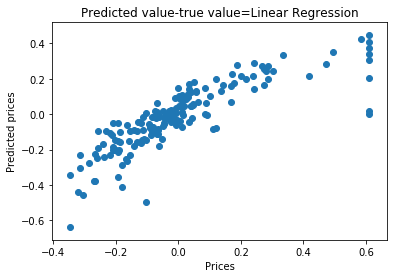

In [32]:
plt.scatter(Y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Predicted value-true value=Linear Regression")

plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse = mean_squared_error(Y_test,pred) 
print("Mean Square Error : ", mse)

Mean Square Error :  0.014089115439987471


In [35]:
#Building the model
m=0
c=0
L = 0.0001 
it= 1000  
n = float(len(X))
#Building Gradient Descent 
for i in range(it): 
    Y_pred = m*X + c
    D_m = (-2/n) * sum(X * (Y - Y_pred))  
    D_c = (-2/n) * sum(Y - Y_pred) 
    m = m - L * D_m  
    c = c - L * D_c  
    print (m, c)

0.050499999999999996 0.050499999999999996
0.10099999999999999 0.10099999999999999
0.1515 0.1515
0.20199999999999999 0.20199999999999999
0.2525 0.2525
0.303 0.303
0.3535 0.3535
0.40399999999999997 0.40399999999999997
0.45449999999999996 0.45449999999999996
0.505 0.505
0.5555 0.5555
0.606 0.606
0.6565 0.6565
0.707 0.707
0.7575 0.7575
0.8079999999999999 0.8079999999999999
0.8584999999999999 0.8584999999999999
0.9089999999999999 0.9089999999999999
0.9594999999999999 0.9594999999999999
1.01 1.01
1.0605 1.0605
1.111 1.111
1.1615 1.1615
1.212 1.212
1.2625 1.2625
1.313 1.313
1.3635 1.3635
1.414 1.414
1.4645 1.4645
1.515 1.515
1.5655 1.5655
1.6159999999999999 1.6159999999999999
1.6664999999999999 1.6664999999999999
1.7169999999999999 1.7169999999999999
1.7674999999999998 1.7674999999999998
1.8179999999999998 1.8179999999999998
1.8684999999999998 1.8684999999999998
1.9189999999999998 1.9189999999999998
1.9694999999999998 1.9694999999999998
2.02 2.02
2.0705 2.0705
2.121 2.121
2.1715 2.1715
2.222 

In [37]:
pred

array([ 0.33187621,  0.1968609 ,  0.101942  , -0.35698606,  0.24659691,
       -0.37471392,  0.10014801,  0.16431647,  0.08497349, -0.00178547,
        0.21493862, -0.01658644,  0.01952396,  0.24613638,  0.12785308,
       -0.16431591, -0.49404296, -0.08476228, -0.17915856, -0.25387934,
       -0.44084143, -0.07368598,  0.35286194,  0.0408124 ,  0.20182507,
       -0.2469045 ,  0.05324035,  0.01731054,  0.00541337, -0.04182209,
       -0.1443913 , -0.34340044, -0.10839365,  0.00626443,  0.14859173,
       -0.08709468,  0.12987138, -0.30505861,  0.42485774,  0.25547323,
       -0.05213142, -0.41281773,  0.15907643, -0.23004431,  0.10358286,
        0.18009302, -0.63960735, -0.05747924, -0.02181259, -0.20373388,
       -0.04760277, -0.05909496,  0.02319472, -0.20291986, -0.10818298,
        0.0498098 ,  0.28404353, -0.15665833,  0.13277421, -0.0179345 ,
       -0.04336395,  0.07892894, -0.17810304,  0.21871409, -0.03830294,
       -0.22985514, -0.0683843 ,  0.0600244 , -0.01688407, -0.02

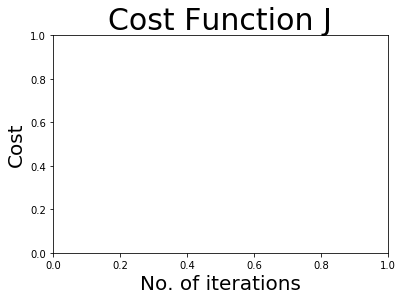

In [38]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.show()

In [39]:
from sklearn.linear_model import Ridge

In [40]:
from sklearn.linear_model import Lasso

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.0001, normalize=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, Y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, Y_test)))

Training Score: 0.9331587620605811
Test Score: 0.8241275939114753


In [45]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=3, normalize=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, Y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train,Y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, Y_test)))

Training score: 0.0
Test score: -1.86320331785339e-06
